In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [20]:
import urllib.request
import os

filepath = "/Users/finntran/Downloads/boston_housing_clean.pickle"
boston = pd.read_pickle(filepath)

boston_data = boston['dataframe']
boston_description = boston['description']
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

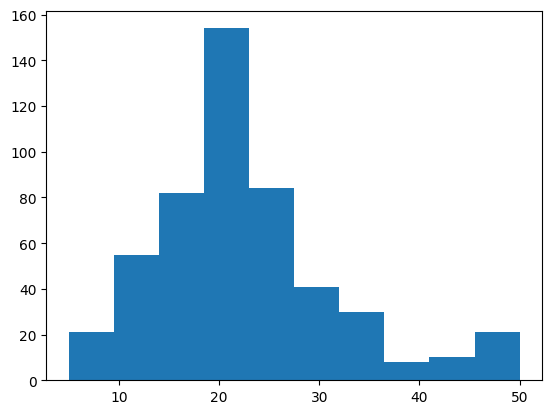

In [ ]:
plt.hist(boston_data.MEDV)

MEDV value appears to have a right skewness, not normal. 

In [24]:
from scipy.stats import normaltest
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=np.float64(90.9746873700967), pvalue=np.float64(1.7583188871696095e-20))

Testing for normality, where p value > 0.05 indicates normal. 

NormaltestResult(statistic=np.float64(17.21801696640698), pvalue=np.float64(0.00018245472768345196))

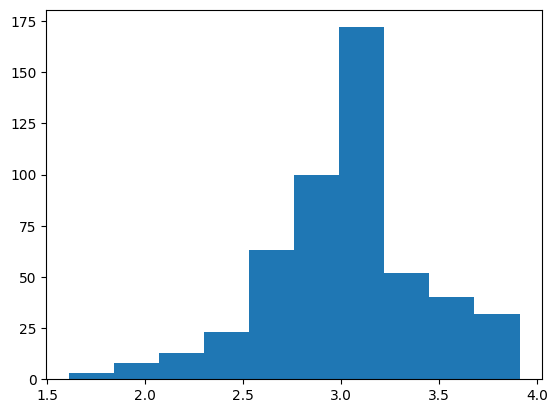

In [27]:
log_MEDV = np.log(boston_data.MEDV)
plt.hist(log_MEDV)
normaltest(log_MEDV)

Applied log transformation to the data. Also doesn't appear normal, there's left skewness this time, with p values still below 0.05. 

NormaltestResult(statistic=np.float64(20.487090826863067), pvalue=np.float64(3.558645701429252e-05))

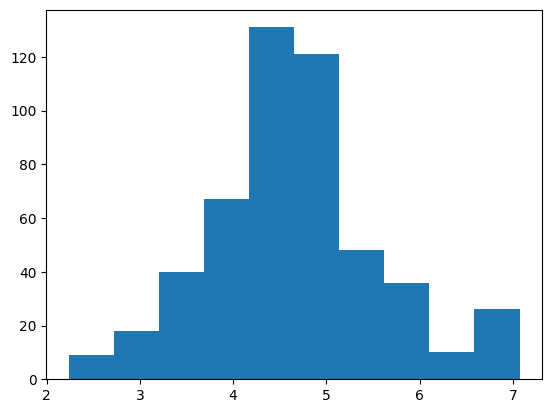

In [30]:
sqrt_MEDV = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_MEDV)
normaltest(sqrt_MEDV)

Applied square root test, data also isn't normal according to the p value test. 

NormaltestResult(statistic=np.float64(4.513528777459214), pvalue=np.float64(0.10468866918093613))

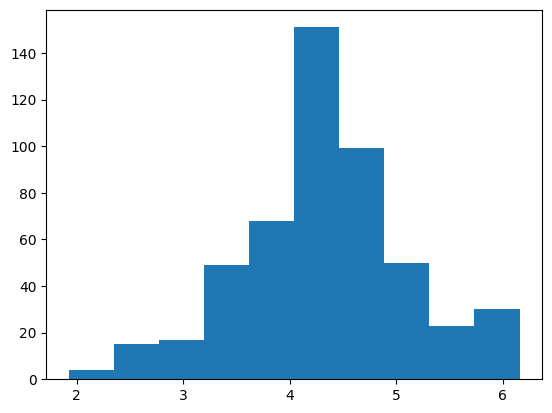

In [ ]:
from scipy.stats import boxcox
medv_boxcox, fitted_lambda = boxcox(boston_data.MEDV)
plt.hist(medv_boxcox)
normaltest(medv_boxcox)

Data appears normal. P value > 0.05, therefore data is normal (Failed to reject null hypothesis)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [34]:
lr = LinearRegression()

In [40]:
X = boston_data.drop('MEDV', axis = 1)
Y = boston_data['MEDV']

Remove column 'MEDV', X column contains only predictor values. 

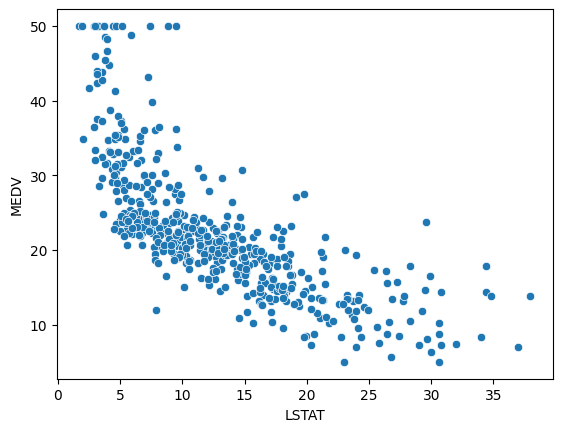

In [52]:
sns.scatterplot(x = boston_data['LSTAT'], y = boston_data['MEDV'])
plt.show()

Observing individual relationships between medium value with other predictor values to see if relationships are linear or not to apply polynomial features. It appears that LSTAT relationship follows a curve, so we will apply a polynomial feature.

In [53]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [59]:
X_train, X_test, y_train_bc, y_test_bc = train_test_split(X_pf, medv_boxcox, test_size=0.3, random_state=42)


In [66]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test) 
y_pred_bc = lr.predict(X_test_s)

Scaling data. 

In [65]:
lr.fit(X_train_s, y_train_bc)
y_pred_bc = lr.predict(X_test_s)

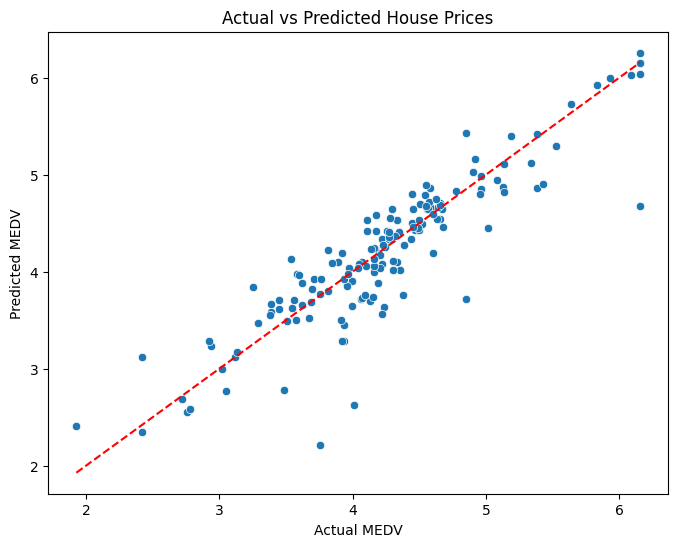

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_bc, y=y_pred_bc)
plt.plot([y_test_bc.min(), y_test_bc.max()], [y_test_bc.min(), y_test_bc.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_bc, y_pred_bc)
r2 = r2_score(y_test_bc, y_pred_bc)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.12
R² Score: 0.78
